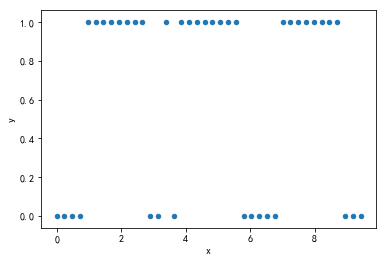

In [2]:
# 生成训练数据

import numpy as np
import pandas as pd


n = 40
np.random.seed(1010)
X = np.linspace(0, 3 * np.pi, num=n).reshape(-1, 1)
error = np.random.normal(0, 0.1, size=n).reshape(-1, 1)
Y = np.abs(np.sin(X)) + error
Y = np.where(Y > 0.5, 1, 0)
data = np.concatenate((Y, X), axis=1)
data = pd.DataFrame(data, columns=["y", "x"])
data.plot.scatter(x="x", y="y")

In [3]:
# 训练GBDT模型

from sklearn.ensemble import GradientBoostingRegressor


model = GradientBoostingRegressor(n_estimators=3, max_depth=2, learning_rate=0.8)
model.fit(data[["x"]], data["y"])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.8, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [4]:
# 对数据进行预测

model.predict([[2], [0]])

array([0.85368687, 0.24762626])

In [5]:
# GBDT逐次预测结果

for i in model.staged_predict([[2], [0]]): print(i)

[0.73106061 0.125     ]
[0.79368687 0.18762626]
[0.85368687 0.24762626]


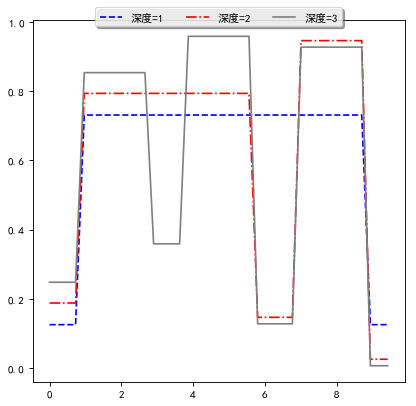

In [6]:
# 将模型结果可视化

import matplotlib.pyplot as plt


## 创建一个图形框    
fig = plt.figure(figsize=(6, 6), dpi=80)
ax = fig.add_subplot(1, 1, 1)
## 定义每一个层级的标题和样式
labels = ["深度=1", "深度=2", "深度=3"]
styles = ["b--", "r-.", "gray"]
for l, s, pred in zip(labels, styles, model.staged_predict(data[["x"]])):
    plt.plot(data[["x"]], pred, s, label=l)
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
                   ncol=3, fancybox=True, shadow=True)
plt.show()